<a href="https://colab.research.google.com/github/SALMA55ASHRAF/AI_instant_tasks/blob/master/Healthcare_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("/content/healthmonitoring.csv")

In [3]:
df.head()

,PatientID,Age,Gender,HeartRate,BloodPressure,RespiratoryRate,BodyTemperature,ActivityLevel,OxygenSaturation,SleepQuality,StressLevel,Timestamp
0,1,69,Male,60.993428,130/85,15,98.885236,resting,95.0,excellent,low,2024-04-26 17:28:55.286711
1,2,32,Male,98.723471,120/80,23,98.281883,walking,97.0,good,high,2024-04-26 17:23:55.286722
2,3,78,Female,82.295377,130/85,13,98.820286,resting,98.0,fair,high,2024-04-26 17:18:55.286726
3,4,38,Female,80.000000,111/78,19,98.412594,running,98.0,poor,moderate,2024-04-26 17:13:55.286728
4,5,41,Male,87.531693,120/80,14,99.369871,resting,98.0,good,low,2024-04-26 17:08:55.286731


In [4]:
df.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

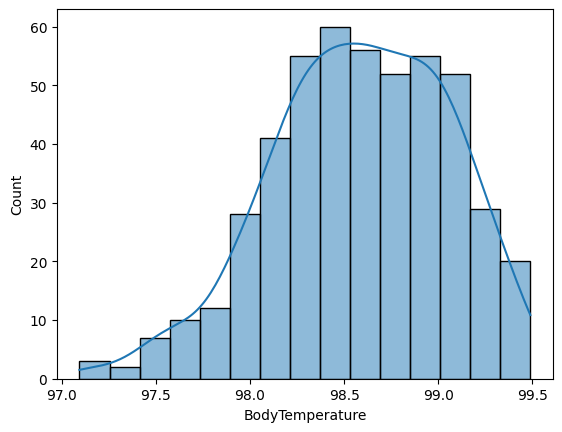

In [5]:
sns.histplot(df['BodyTemperature'],kde=True);

as we see tempture the best to fill null values with median

In [6]:
df['BodyTemperature'].fillna(df['BodyTemperature'].median(),inplace=True)

<Axes: xlabel='OxygenSaturation', ylabel='Count'>

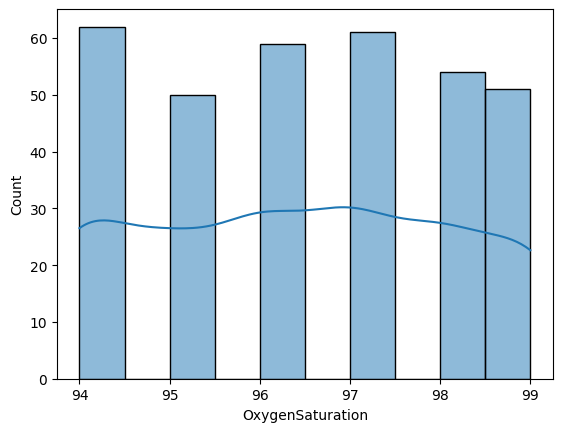

In [7]:
sns.histplot(df['OxygenSaturation'],kde=True)

the best to fill null values of oxygen saturation with median

In [8]:
df['OxygenSaturation'].fillna(df['OxygenSaturation'].median(),inplace=True)

In [9]:
df.isnull().sum()

PatientID           0
Age                 0
Gender              0
HeartRate           0
BloodPressure       0
RespiratoryRate     0
BodyTemperature     0
ActivityLevel       0
OxygenSaturation    0
SleepQuality        0
StressLevel         0
Timestamp           0
dtype: int64

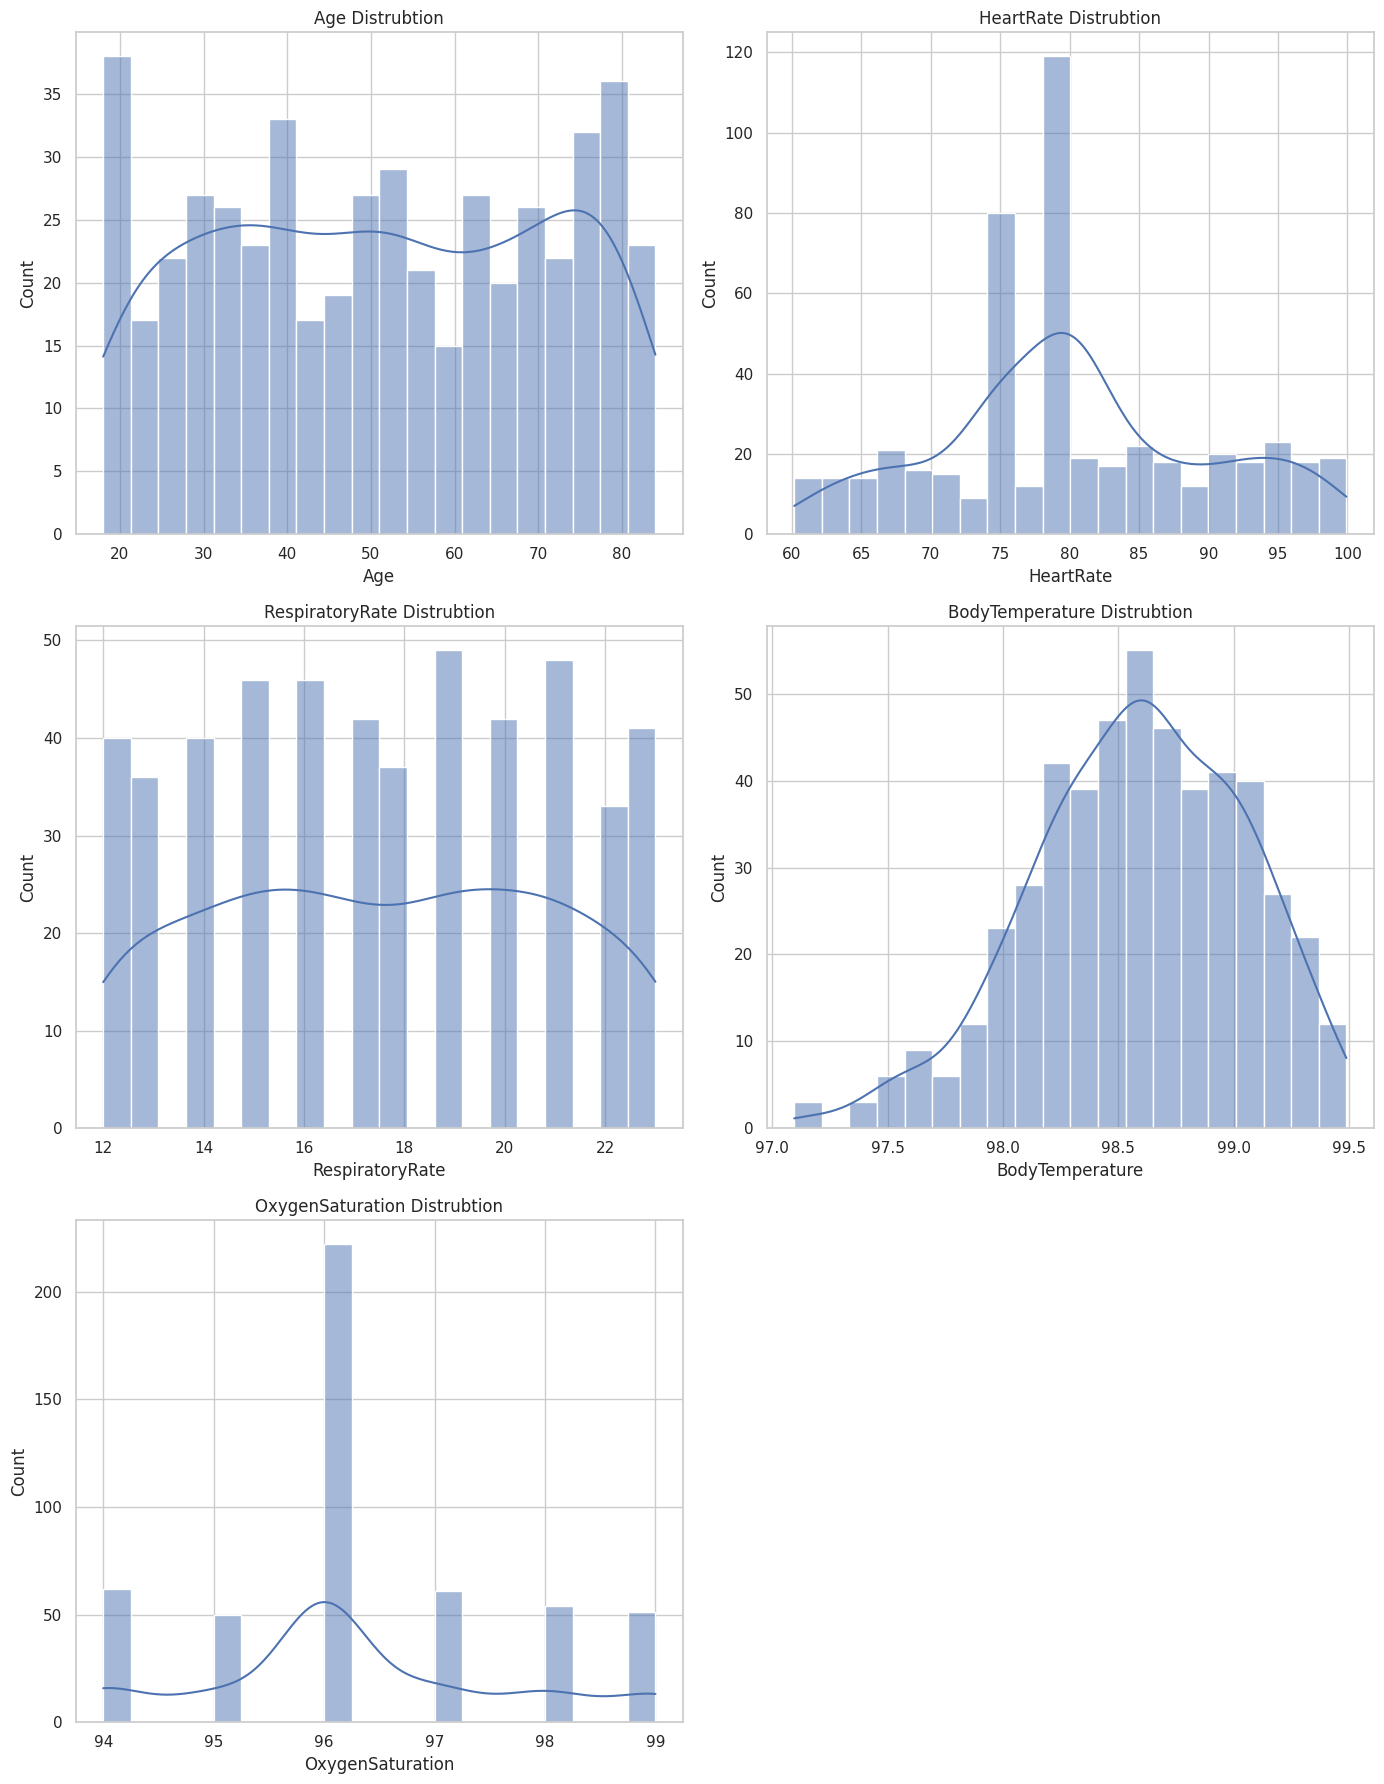

In [10]:
sns.set(style="whitegrid")
summary_stats=df.describe()
fig,axes=plt.subplots(3,2,figsize=(14,18))
sns.histplot(df['Age'],bins=20,kde=True,ax=axes[0,0])
axes[0,0].set_title('Age Distrubtion')
sns.histplot(df['HeartRate'],bins=20,kde=True,ax=axes[0,1])
axes[0,1].set_title('HeartRate Distrubtion')
sns.histplot(df['RespiratoryRate'],bins=20,kde=True,ax=axes[1,0])
axes[1,0].set_title('RespiratoryRate Distrubtion')
sns.histplot(df['BodyTemperature'],bins=20,kde=True,ax=axes[1,1])
axes[1,1].set_title('BodyTemperature Distrubtion')
sns.histplot(df['OxygenSaturation'],bins=20,kde=True,ax=axes[2,0])
axes[2,0].set_title('OxygenSaturation Distrubtion')
fig.delaxes(axes[2,1]) # remove unused supplot
plt.tight_layout()
plt.show()




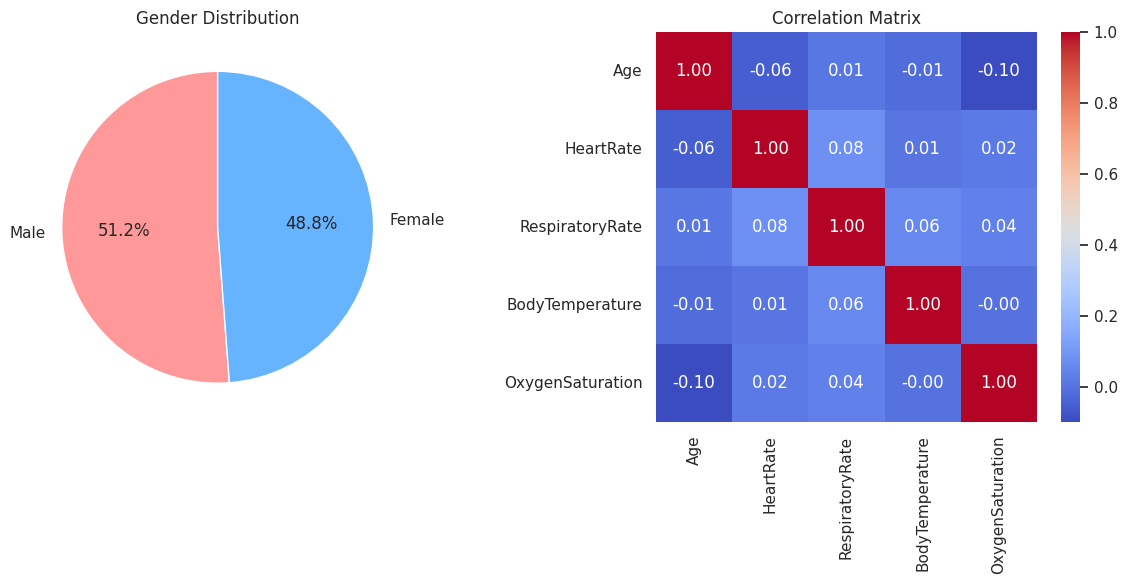

In [11]:
# gender Distribution
gender_counts = df['Gender'].value_counts()

# correlation Matrix for numerical health metrics
correlation_matrix = df[['Age', 'HeartRate', 'RespiratoryRate', 'BodyTemperature', 'OxygenSaturation']].corr()

# plotting the findings
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# gender distribution plot
gender_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[0].set_ylabel('')
axes[0].set_title('Gender Distribution')

# correlation matrix plot
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

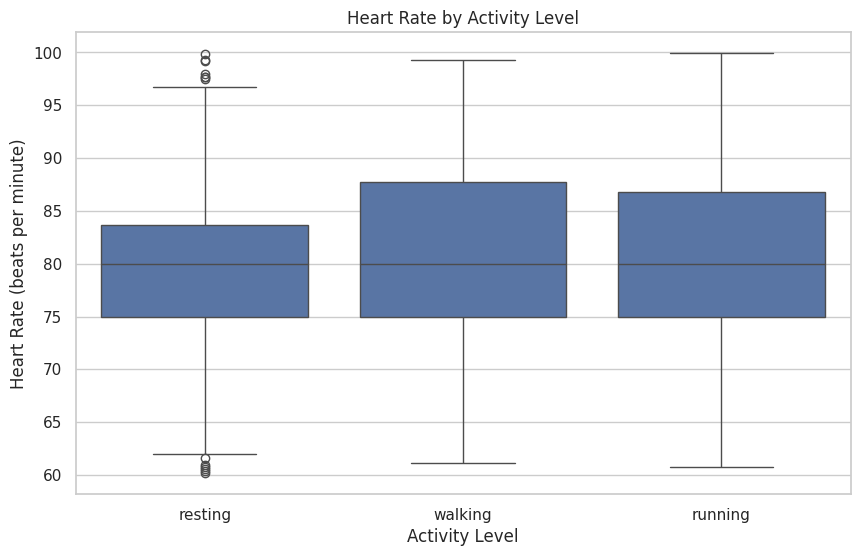

In [12]:
# heart Rate by activity level
plt.figure(figsize=(10, 6))
sns.boxplot(x='ActivityLevel', y='HeartRate', data=df)
plt.title('Heart Rate by Activity Level')
plt.ylabel('Heart Rate (beats per minute)')
plt.xlabel('Activity Level')
plt.show()

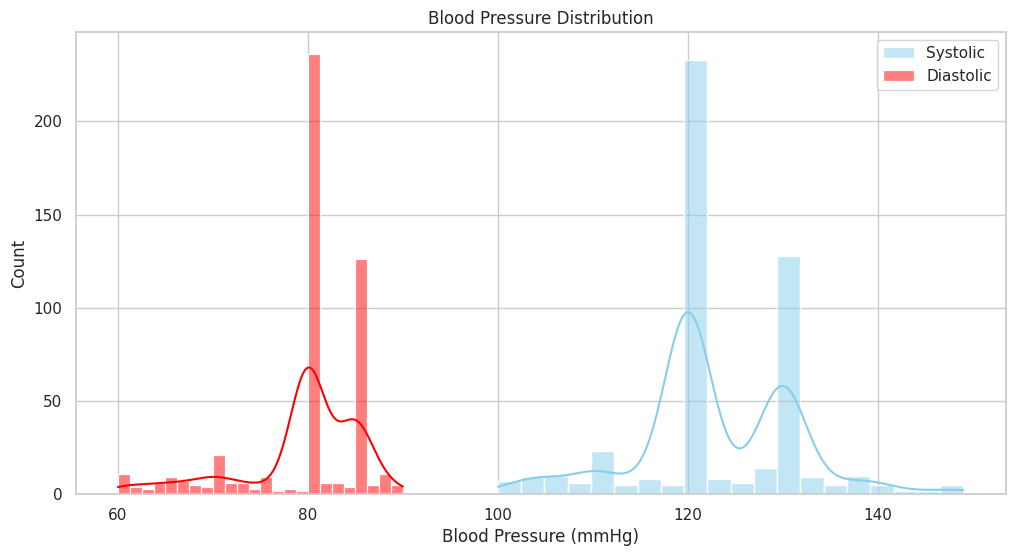

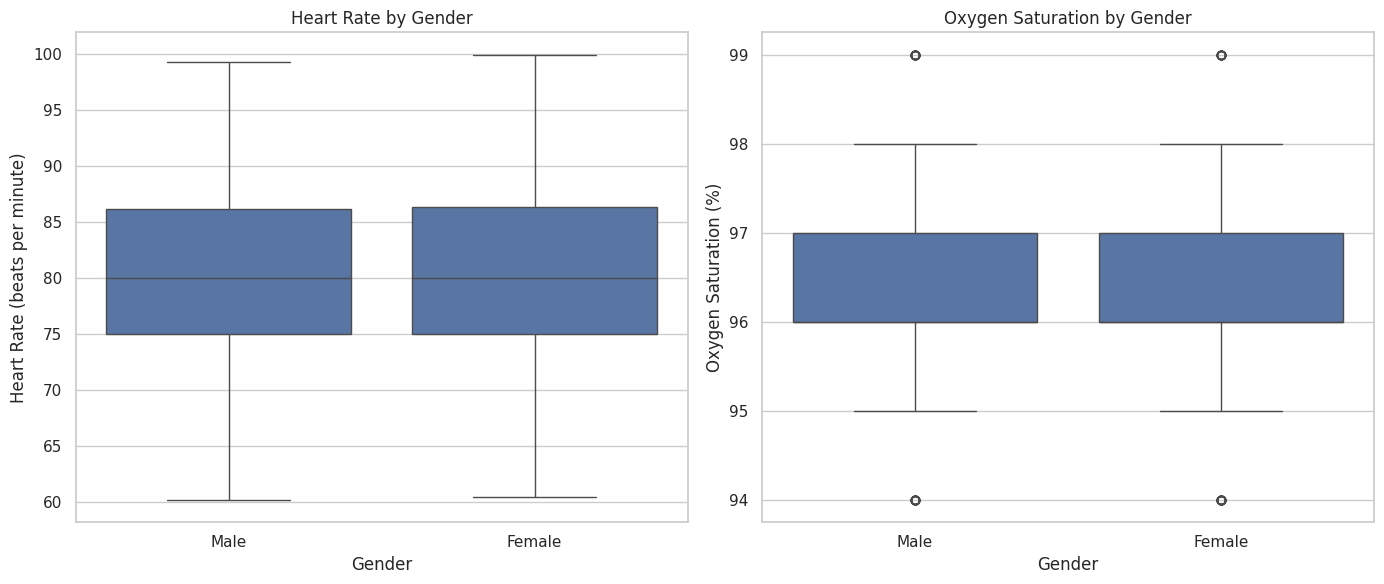

In [13]:
# extracting systolic and diastolic blood pressure for analysis
df[['SystolicBP', 'DiastolicBP']] = df['BloodPressure'].str.split('/', expand=True).astype(int)

# blood pressure distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['SystolicBP'], color="skyblue", label="Systolic", kde=True)
sns.histplot(df['DiastolicBP'], color="red", label="Diastolic", kde=True)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mmHg)')
plt.legend()
plt.show()

# health metrics by gender
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Gender', y='HeartRate', data=df, ax=axes[0])
axes[0].set_title('Heart Rate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Heart Rate (beats per minute)')

sns.boxplot(x='Gender', y='OxygenSaturation', data=df, ax=axes[1])
axes[1].set_title('Oxygen Saturation by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

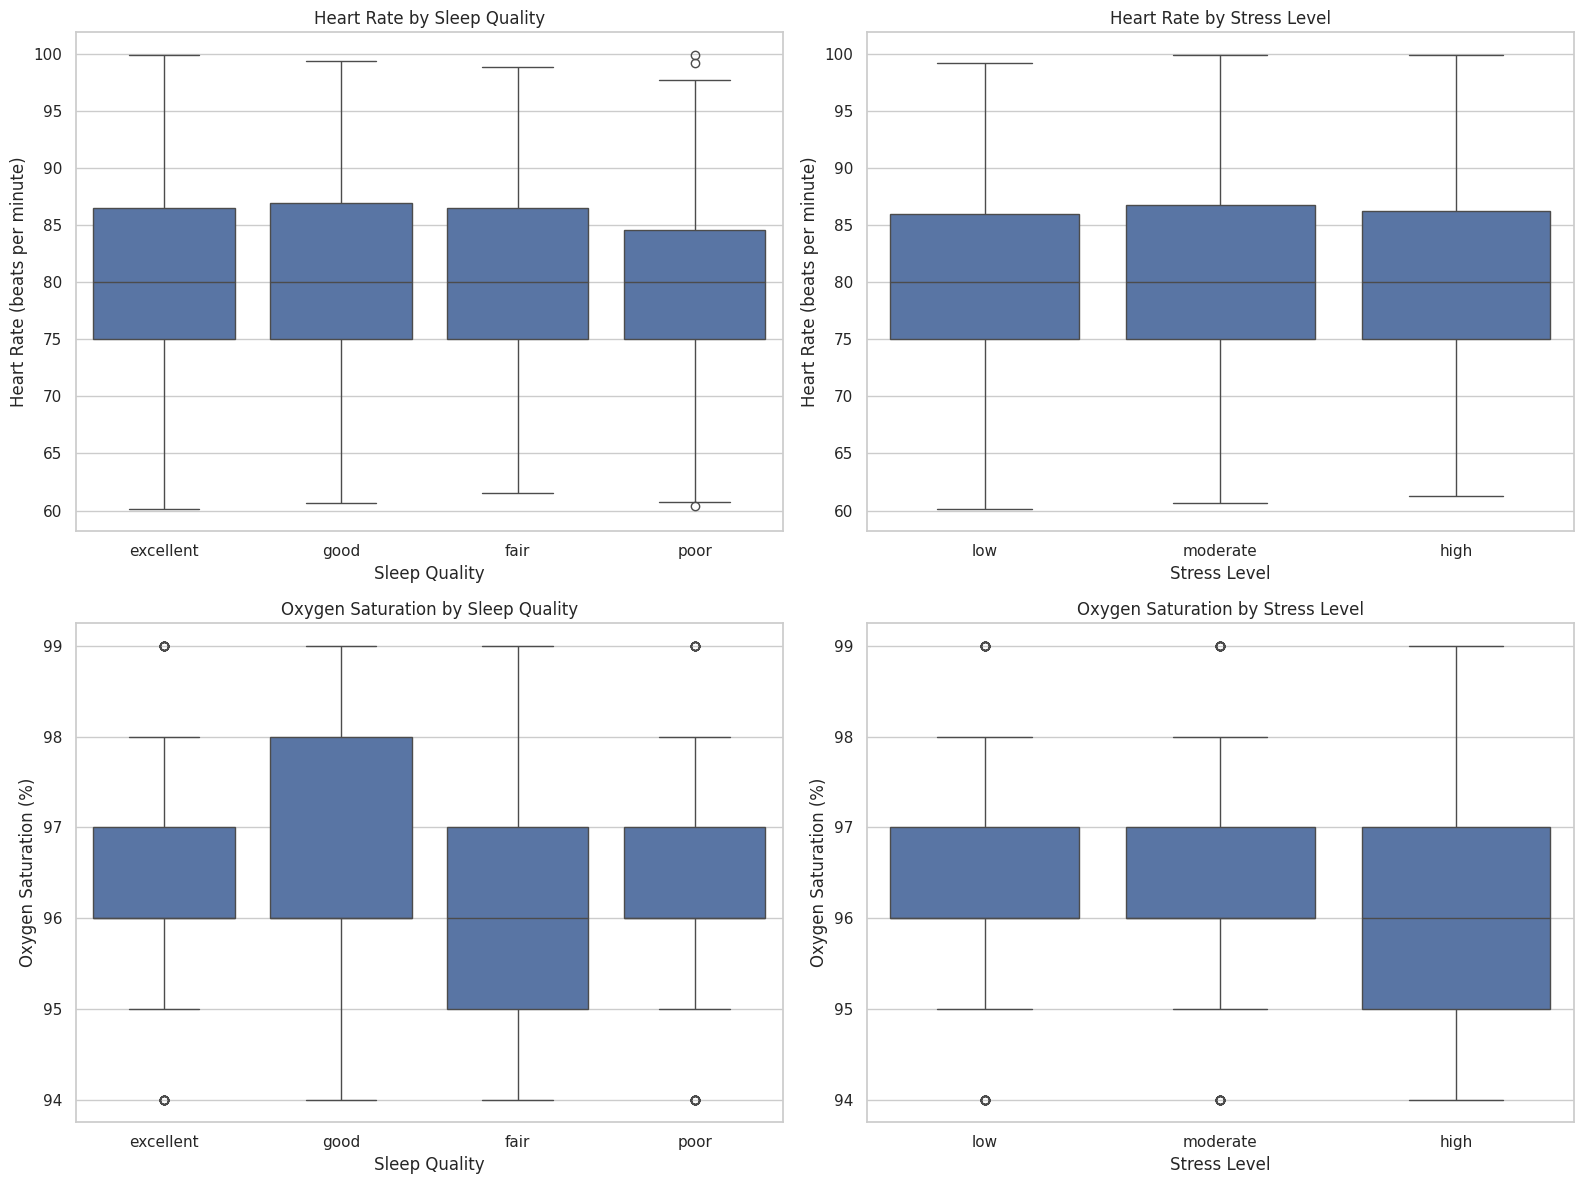

In [14]:
# categorizing sleep quality and stress level for better analysis
sleep_quality_order = ['excellent', 'good', 'fair', 'poor']
stress_level_order = ['low', 'moderate', 'high']

# creating plots to examine relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# heart rate by sleep quality
sns.boxplot(x='SleepQuality', y='HeartRate', data=df, order=sleep_quality_order, ax=axes[0, 0])
axes[0, 0].set_title('Heart Rate by Sleep Quality')
axes[0, 0].set_xlabel('Sleep Quality')
axes[0, 0].set_ylabel('Heart Rate (beats per minute)')

# heart rate by stress level
sns.boxplot(x='StressLevel', y='HeartRate', data=df, order=stress_level_order, ax=axes[0, 1])
axes[0, 1].set_title('Heart Rate by Stress Level')
axes[0, 1].set_xlabel('Stress Level')
axes[0, 1].set_ylabel('Heart Rate (beats per minute)')

# oxygen saturation by sleep quality
sns.boxplot(x='SleepQuality', y='OxygenSaturation', data=df, order=sleep_quality_order, ax=axes[1, 0])
axes[1, 0].set_title('Oxygen Saturation by Sleep Quality')
axes[1, 0].set_xlabel('Sleep Quality')
axes[1, 0].set_ylabel('Oxygen Saturation (%)')

# oxygen saturation by stress level
sns.boxplot(x='StressLevel', y='OxygenSaturation', data=df, order=stress_level_order, ax=axes[1, 1])
axes[1, 1].set_title('Oxygen Saturation by Stress Level')
axes[1, 1].set_xlabel('Stress Level')
axes[1, 1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

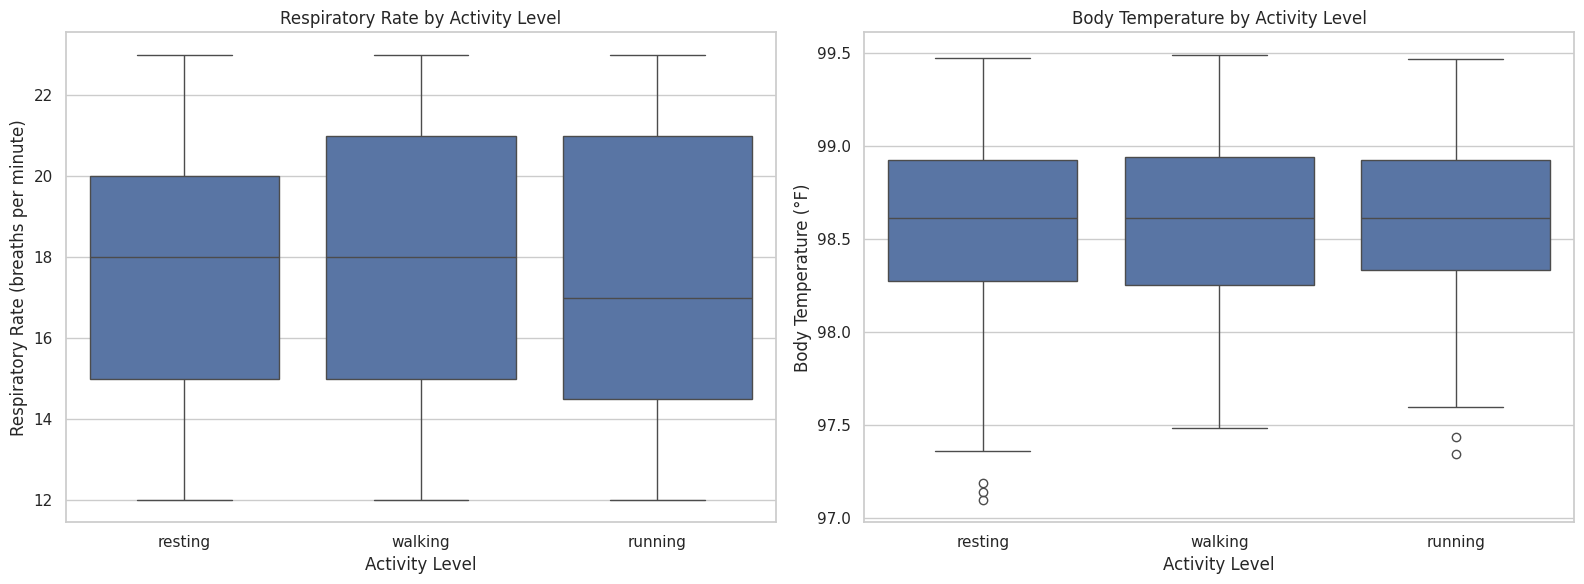

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# respiratory rate by activity level
sns.boxplot(x='ActivityLevel', y='RespiratoryRate', data=df, ax=axes[0])
axes[0].set_title('Respiratory Rate by Activity Level')
axes[0].set_xlabel('Activity Level')
axes[0].set_ylabel('Respiratory Rate (breaths per minute)')

# body temperature by activity level
sns.boxplot(x='ActivityLevel', y='BodyTemperature', data=df, ax=axes[1])
axes[1].set_title('Body Temperature by Activity Level')
axes[1].set_xlabel('Activity Level')
axes[1].set_ylabel('Body Temperature (°F)')

plt.tight_layout()
plt.show()

In [16]:
# function to categorize Age

def age_group(age):

    if age <= 35:

        return 'Young'

    elif age <= 55:

        return 'Middle-aged'

    else:

        return 'Senior'

# function to categorize Blood Pressure

def bp_category(systolic, diastolic):

    if systolic < 120 and diastolic < 80:

        return 'Normal'

    elif 120 <= systolic < 140 or 80 <= diastolic < 90:

        return 'Elevated'

    elif 140 <= systolic < 160 or 90 <= diastolic < 100:

        return 'Hypertension Stage 1'

    else:

        return 'Hypertension Stage 2'

# function to categorize Heart Rate

def hr_category(hr):

    if hr < 60:

        return 'Low'

    elif hr <= 100:

        return 'Normal'

    else:

        return 'High'

# function to categorize Oxygen Saturation

def oxy_category(oxy):

    if oxy < 94:

        return 'Low'

    else:

        return 'Normal'

# applying categorizations

df['AgeGroup'] = df['Age'].apply(age_group)

df['BPCategory'] = df.apply(lambda x: bp_category(x['SystolicBP'], x['DiastolicBP']), axis=1)

df['HRCategory'] = df['HeartRate'].apply(hr_category)

df['OxyCategory'] = df['OxygenSaturation'].apply(oxy_category)

print(df[['Age', 'AgeGroup', 'SystolicBP', 'DiastolicBP', 'BPCategory', 'HeartRate', 'HRCategory', 'OxygenSaturation', 'OxyCategory']].head())

   Age     AgeGroup  SystolicBP  DiastolicBP BPCategory  HeartRate HRCategory  \
0   69       Senior         130           85   Elevated  60.993428     Normal   
1   32        Young         120           80   Elevated  98.723471     Normal   
2   78       Senior         130           85   Elevated  82.295377     Normal   
3   38  Middle-aged         111           78     Normal  80.000000     Normal   
4   41  Middle-aged         120           80   Elevated  87.531693     Normal   

   OxygenSaturation OxyCategory  
0              95.0      Normal  
1              97.0      Normal  
2              98.0      Normal  
3              98.0      Normal  
4              98.0      Normal  


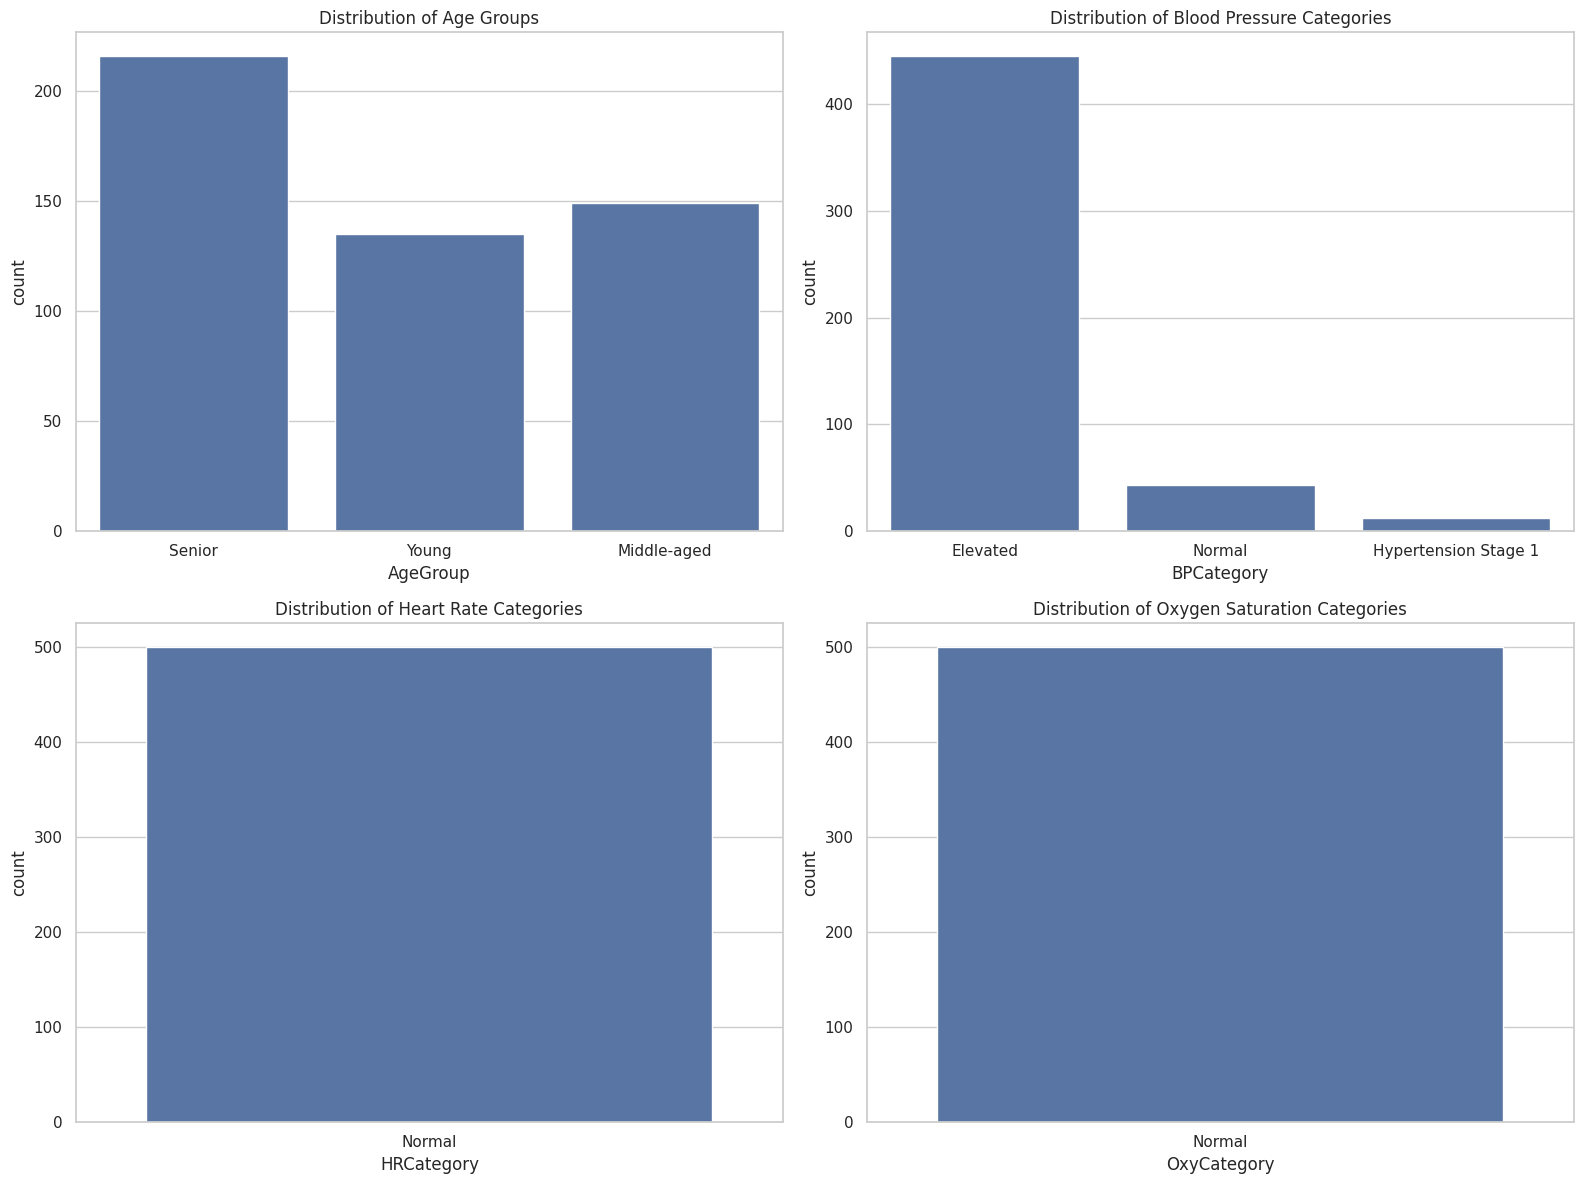

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age Group count plot
sns.countplot(x='AgeGroup', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age Groups')

# Blood Pressure Category count plot
sns.countplot(x='BPCategory', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Blood Pressure Categories')

# Heart Rate Category count plot
sns.countplot(x='HRCategory', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Heart Rate Categories')

# Oxygen Saturation Category count plot
sns.countplot(x='OxyCategory', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Oxygen Saturation Categories')

# Show the plots
plt.tight_layout()
plt.show()